## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [113]:
# Start solution here
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [114]:
# loading data
data = pd.read_csv('default of credit card clients.csv')
# show data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [115]:
# remove ID column because it's redundant with indexing
data = data.drop(['ID'], axis=1)
data.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [116]:
# get a better look at stats of the dataset
data.describe()
# data already all numeric so no need to convert to dummy variables

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [117]:
# check if there are null values in data
data.isna().sum()
# no null values

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

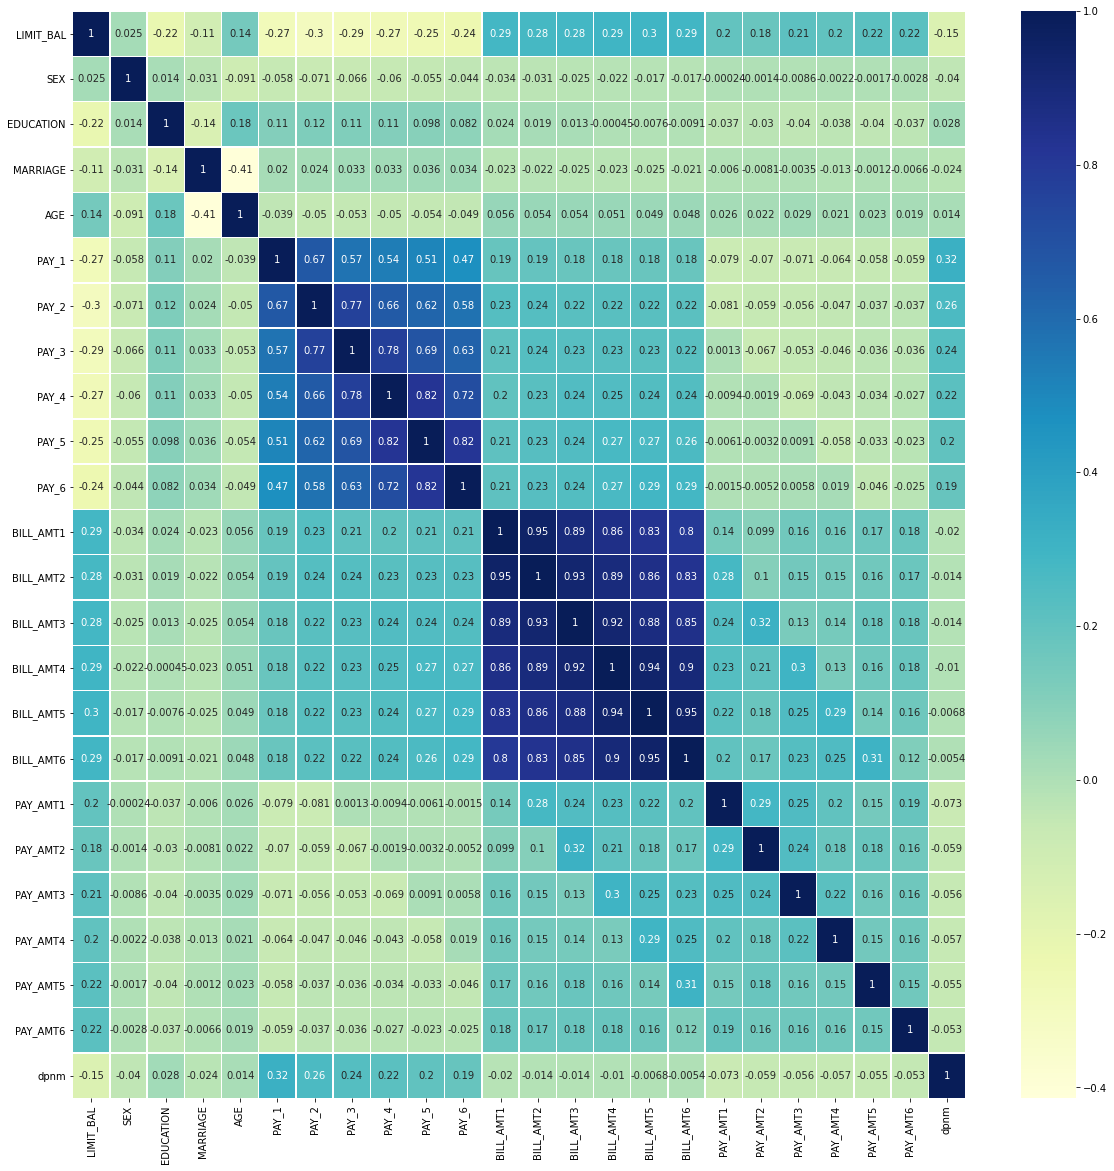

In [118]:
plt.figure(figsize=(20,20))
sb.heatmap(data.corr(),annot=True,cmap="YlGnBu", linewidth=0.5)
# can see that bill amounts are highly correlated
# dpnm most correlated with repay status (proven by all models tried)

In [119]:
# decide which variables to make independent and dependent variables
# dependent variable will be 'dpnm', which is whether or not the client defaults
X = data[data.columns[:-1]]
y = data['dpnm']

# split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25, stratify=y)

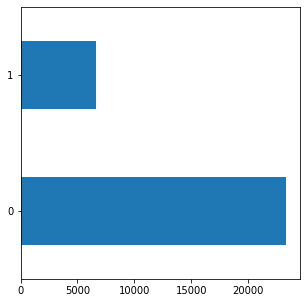

In [120]:
# 0 = did not default, 1 = defaulted clients
data['dpnm'].value_counts().plot(kind='barh')

In [121]:
# Model 1
# random forest model
rf_model = RandomForestClassifier(random_state=42, bootstrap=False, max_features=3, n_estimators=10, max_depth=3, min_impurity_decrease=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
rf_prediction = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print("Random Forest Accuracy = " + str(rf_accuracy))

Random Forest Accuracy = 0.8092222222222222


In [123]:
# most important features in determining whether or not client will default for rf model
print("Feature importance", rf_model.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_))
print(imp.sort_values(by=[1]))
# guess was that age and sex would at least have a bit of influence, marriage as well, perhaps even education, and LIMIT_BAL of course

Feature importance [3.21406626e-02 0.00000000e+00 2.89312812e-04 0.00000000e+00
 1.05409947e-03 3.18884823e-01 1.48400966e-01 1.12626725e-01
 2.38386669e-01 2.97241659e-02 3.65373928e-02 2.90358243e-03
 9.67041230e-04 6.70068972e-03 5.31428552e-03 5.09944264e-04
 6.10484128e-04 4.06664445e-02 8.31825824e-03 1.91918819e-03
 0.00000000e+00 9.20953520e-03 4.83572952e-03]
            0         1
1         SEX  0.000000
3    MARRIAGE  0.000000
20   PAY_AMT4  0.000000
2   EDUCATION  0.000289
15  BILL_AMT5  0.000510
16  BILL_AMT6  0.000610
12  BILL_AMT2  0.000967
4         AGE  0.001054
19   PAY_AMT3  0.001919
11  BILL_AMT1  0.002904
22   PAY_AMT6  0.004836
14  BILL_AMT4  0.005314
13  BILL_AMT3  0.006701
18   PAY_AMT2  0.008318
21   PAY_AMT5  0.009210
9       PAY_5  0.029724
0   LIMIT_BAL  0.032141
10      PAY_6  0.036537
17   PAY_AMT1  0.040666
7       PAY_3  0.112627
6       PAY_2  0.148401
8       PAY_4  0.238387
5       PAY_1  0.318885


[[6755  254]
 [1463  528]]
Accuracy = 0.8092222222222222


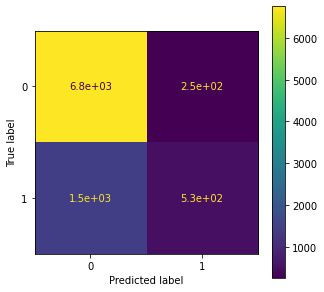

In [124]:
# print confusion matrix and accuracy of rf model on test data set
cm = metrics.confusion_matrix(y_test, rf_prediction)
print(cm)
print('Accuracy =', metrics.accuracy_score(y_test, rf_prediction))

import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

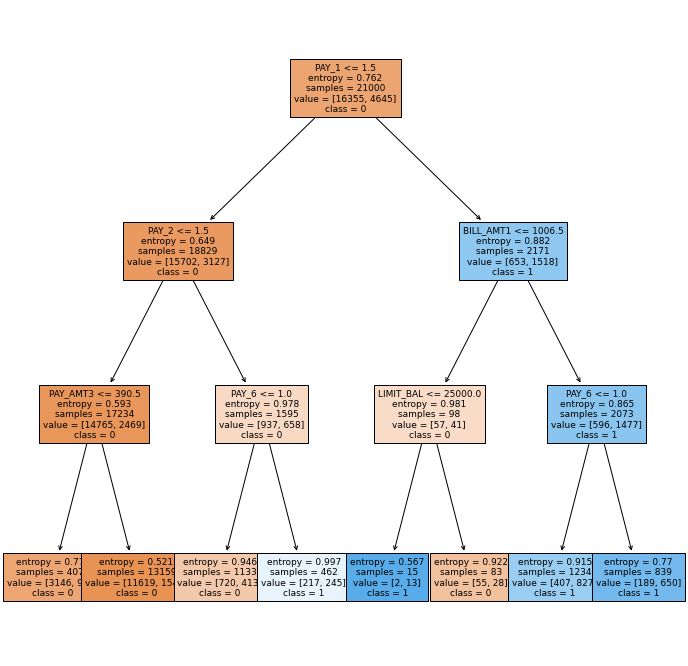

[[6641  368]
 [1259  732]]


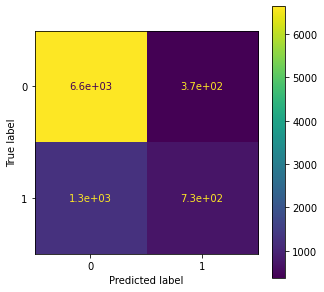

Decision Tree model Accuracy =  0.8192222222222222


In [125]:
# Model 2
# decision tree model
dt = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=2021)
dt.fit(X_train, y_train)
ypredict = dt.predict(X_test)

fn = X.columns
plt.figure(figsize=(12,12))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True, fontsize=9)
plt.show()

# decision tree confusion matrix and accuracy using entropy as criterion
cm_dt = confusion_matrix(y_test, ypredict)
print(cm_dt)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
dt_accuracy = dt.score(X_test, y_test)
print("Decision Tree model Accuracy = ", dt_accuracy)

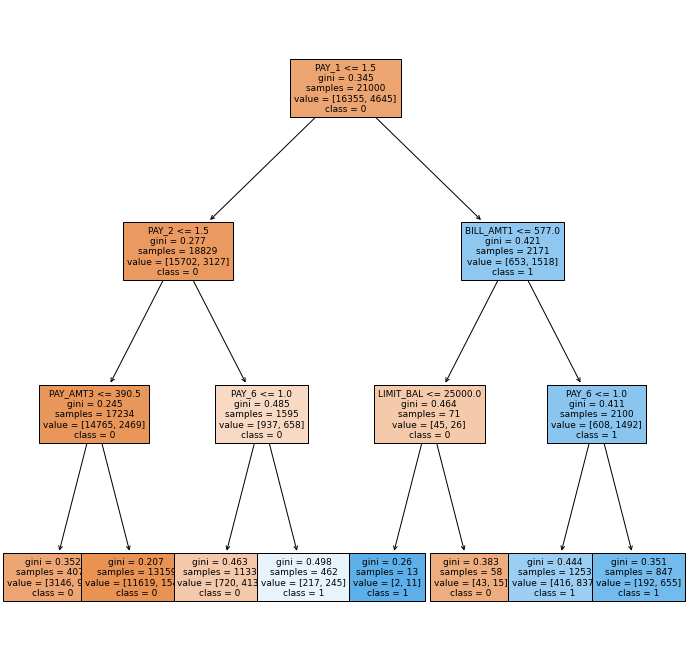

[[6637  372]
 [1252  739]]


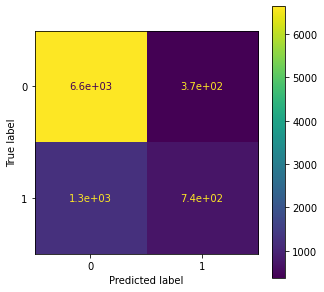

Accuracy of Decision Tree using gini as criterion:  0.8195555555555556


In [126]:
dt2 = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=2021)
dt2.fit(X_train, y_train)
ypredict2 = dt2.predict(X_test)

fn = X.columns
plt.figure(figsize=(12,12))
classList2 = list(map(str,dt2.classes_.tolist()))
a = tree.plot_tree(dt2, feature_names=fn, class_names=classList2, filled=True, fontsize=9)
plt.show()

# decision tree confusion matrix and accuracy using gini as criterion
cm_dt2 = confusion_matrix(y_test, ypredict2)
print(cm_dt2)
metrics.plot_confusion_matrix(dt2, X_test, y_test)
plt.show()
dt2_accuracy = dt2.score(X_test, y_test)
print("Accuracy of Decision Tree using gini as criterion: ", dt2_accuracy)

In [127]:
# fine tuning decision tree model
from scipy.stats import randint
param_dist = {"max_depth": [3,None],
              "criterion": ["gine", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score {}".format(tree_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gine'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gine'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gine

Tuned Decision Tree Parameters: {'max_depth': 3, 'criterion': 'entropy'}
Best score 0.8201428571428572


In [128]:
# fine-tuned decision tree confusion matrix
pred_y = tree_cv.predict(X_test)
cm = confusion_matrix(y_test, pred_y)
print(cm)

fine_tuned_dt_accuracy = tree_cv.score(X_test, y_test)
print(fine_tuned_dt_accuracy)

[[6641  368]
 [1259  732]]
0.8192222222222222


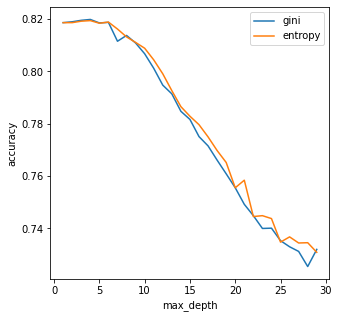

In [130]:
# pruning of decision trees using max_depth
max_depth = []
accuracy_gini = []
accuracy_entropy = []
for i in range(1,30):
# criterion gini
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_gini.append(accuracy_score(y_test, pred))
# criterion entropy
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_entropy.append(accuracy_score(y_test, pred))

 max_depth.append(i)
d = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy_gini', data=d, label='gini')
plt.plot('max_depth','accuracy_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [131]:
# most important features in determining whether or not client will default
print("Feature importance", dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp.sort_values(by=[1]))
# although LIMIT_BAL doesn't crack top 3, it holds most importance when comparing dt, rf, adaBoost models
# age and sex have no importance

Feature importance [0.00424195 0.         0.         0.         0.         0.72106886
 0.16823951 0.         0.         0.         0.01771195 0.00963024
 0.         0.         0.         0.         0.         0.
 0.         0.07910749 0.         0.         0.        ]
            0         1
22   PAY_AMT6  0.000000
14  BILL_AMT4  0.000000
13  BILL_AMT3  0.000000
12  BILL_AMT2  0.000000
21   PAY_AMT5  0.000000
17   PAY_AMT1  0.000000
9       PAY_5  0.000000
15  BILL_AMT5  0.000000
8       PAY_4  0.000000
18   PAY_AMT2  0.000000
20   PAY_AMT4  0.000000
4         AGE  0.000000
3    MARRIAGE  0.000000
2   EDUCATION  0.000000
1         SEX  0.000000
7       PAY_3  0.000000
16  BILL_AMT6  0.000000
0   LIMIT_BAL  0.004242
11  BILL_AMT1  0.009630
10      PAY_6  0.017712
19   PAY_AMT3  0.079107
6       PAY_2  0.168240
5       PAY_1  0.721069


In [132]:
# Model 3-1
# dummy classifier model
dummy_classifier = DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train, y_train)
dummy_accuracy_1 = dummy_classifier.score(X_test, y_test)
print("Baseline Accuracy (using stratified) = " + str(dummy_accuracy_1))

Baseline Accuracy (using stratified) = 0.6601111111111111


In [133]:
# Model 3-2
# dummy classifier model
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
dummy_accuracy_2 = dummy_classifier.score(X_test, y_test)
print("Baseline Accuracy (using most frequent) = " + str(dummy_accuracy_2))

Baseline Accuracy (using most frequent) = 0.7787777777777778


In [134]:
# Model 4 
# AdaBoost Model
ada_boost_model = AdaBoostClassifier(base_estimator=dt, n_estimators=10, random_state=42, learning_rate=0.05)
ada_boost_model.fit(X_train, y_train)
ada_accuracy = accuracy_score(y_test, ada_boost_model.predict(X_test))
print("AdaBoost Accuracy = " + str(ada_accuracy))

AdaBoost Accuracy = 0.8191111111111111


In [135]:
# most important features in determining whether or not client will default for adaBoost model
print("Feature importance", ada_boost_model.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, ada_boost_model.feature_importances_))
print(imp.sort_values(by=[1]))

Feature importance [0.00931956 0.         0.         0.         0.         0.78239967
 0.05172627 0.02176076 0.0360439  0.00570586 0.01156805 0.00516132
 0.00754511 0.         0.         0.         0.         0.00586611
 0.0386458  0.01605798 0.00819962 0.         0.        ]
            0         1
22   PAY_AMT6  0.000000
1         SEX  0.000000
2   EDUCATION  0.000000
3    MARRIAGE  0.000000
4         AGE  0.000000
16  BILL_AMT6  0.000000
15  BILL_AMT5  0.000000
14  BILL_AMT4  0.000000
13  BILL_AMT3  0.000000
21   PAY_AMT5  0.000000
11  BILL_AMT1  0.005161
9       PAY_5  0.005706
17   PAY_AMT1  0.005866
12  BILL_AMT2  0.007545
20   PAY_AMT4  0.008200
0   LIMIT_BAL  0.009320
10      PAY_6  0.011568
19   PAY_AMT3  0.016058
7       PAY_3  0.021761
8       PAY_4  0.036044
18   PAY_AMT2  0.038646
6       PAY_2  0.051726
5       PAY_1  0.782400


In [136]:
# Ranking of the models
models = ["Random Forest", "Decision Tree", "Dummy Model 1", "Dummy Model 2", "AdaBoost", "Fine-Tuned DT"]
accuracies = [rf_accuracy, dt_accuracy, dummy_accuracy_1, dummy_accuracy_2, ada_accuracy, fine_tuned_dt_accuracy]

df_rankings = pd.DataFrame({"Model": models, "Accuracy": accuracies}).sort_values(by="Accuracy", ascending=False)
print(df_rankings)

           Model  Accuracy
1  Decision Tree  0.819222
5  Fine-Tuned DT  0.819222
4       AdaBoost  0.819111
0  Random Forest  0.809222
3  Dummy Model 2  0.778778
2  Dummy Model 1  0.660111


In [137]:
# test if gender or age has direct impact on prediction
# only gender and age differences
# results proved that gender and age do not have significant impact on whether or not a client is likely to default
print(X.columns)

male_to_predict = [20000, 1, 2, 1, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
male = {}
for n in X.columns:
  if n in male_to_predict:
    male[n] = [1]
  else:
    male[n] = [0]
male_predict = pd.DataFrame(male)
print(rf_model.predict(male_predict))

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
[0]


In [138]:
female_to_predict = [20000, 2, 2, 1, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
female = {}
for v in X.columns:
  if v in female_to_predict:
    female[v] = [1]
  else:
    female[v] = [0]
female_predict = pd.DataFrame(female)
print(rf_model.predict(female_predict))

[0]


In [139]:
person_to_predict = [20000, 2, 2, 1, 100, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
person = {}
for v in X.columns:
  if v in person_to_predict:
    person[v] = [1]
  else:
    person[v] = [0]
person_predict = pd.DataFrame(female)
print(dt.predict(person_predict))

[0]


In [140]:
# Gradient Boosting Classifier
# Trying to find its best learning rate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=3, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

# 0.5 learning rate gave best performance on test set and pretty good performance on training set

Learning rate:  0.05
Accuracy score (training): 0.796
Accuracy score (validation): 0.794
Learning rate:  0.075
Accuracy score (training): 0.808
Accuracy score (validation): 0.804
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.809
Learning rate:  0.25
Accuracy score (training): 0.817
Accuracy score (validation): 0.809
Learning rate:  0.5
Accuracy score (training): 0.823
Accuracy score (validation): 0.815
Learning rate:  0.75
Accuracy score (training): 0.822
Accuracy score (validation): 0.811
Learning rate:  1
Accuracy score (training): 0.824
Accuracy score (validation): 0.814


In [141]:
# found best learning rate (yields best performance), print classification confusion matrix and classification report
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=3, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[6644  365]
 [1304  687]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.65      0.35      0.45      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



In [142]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

score = xgb_clf.score(X_test, y_test)
print(score)

0.8198888888888889


In [143]:
# at the very end I wanted to look at how a boosting model would perform
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

[20:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
49    0.367555
Name: test-rmse-mean, dtype: float64


[20:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


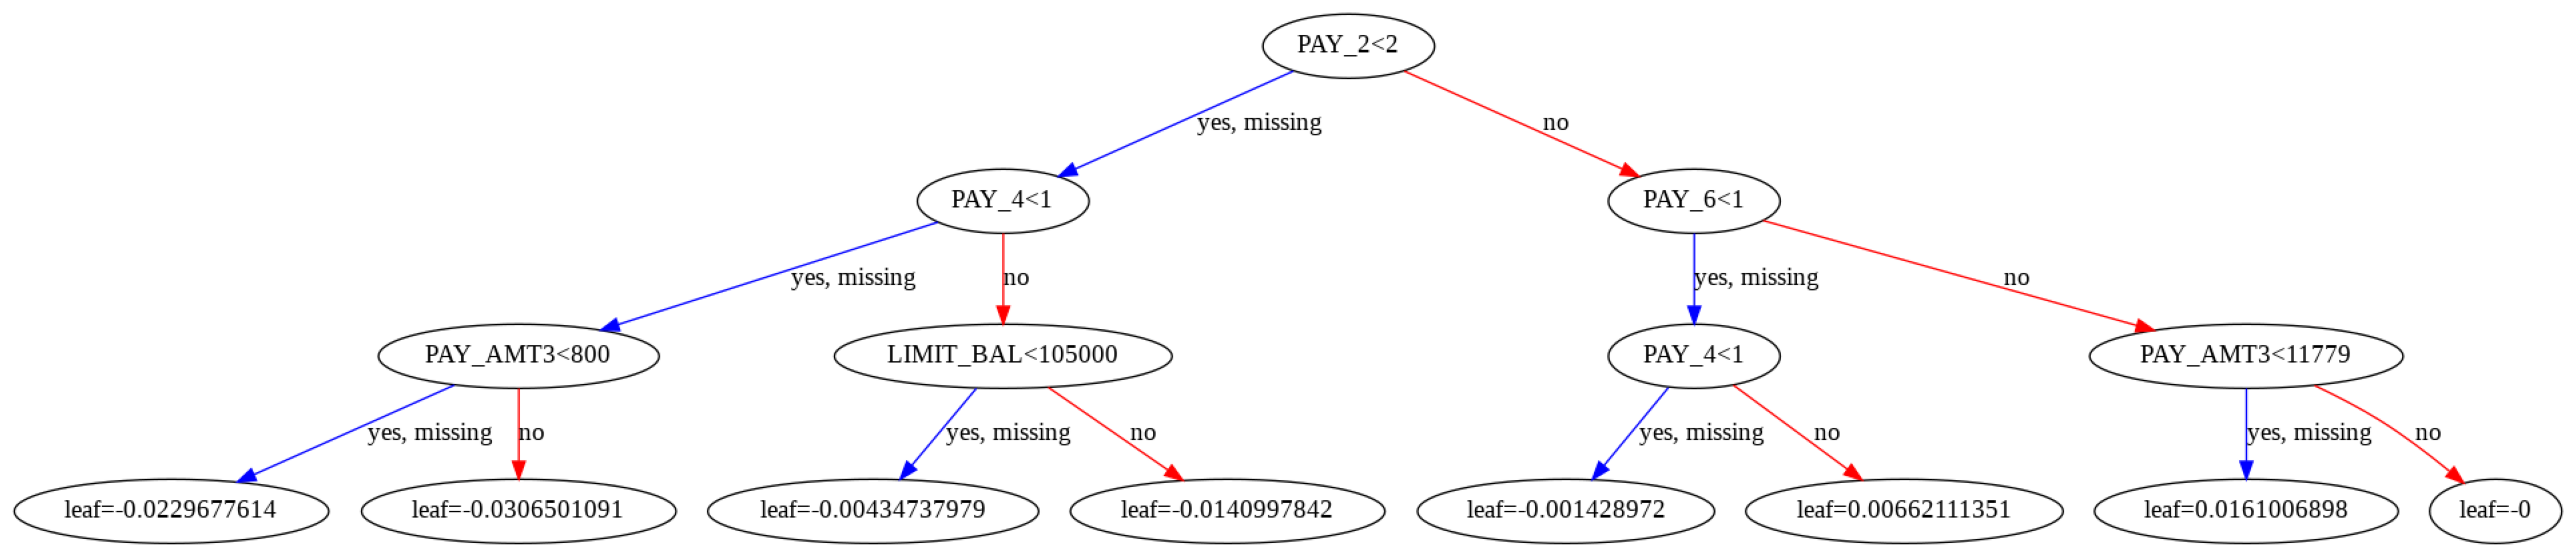

In [145]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=3)
# plot the second tree
xgb.plot_tree(xg_reg,num_trees=2)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

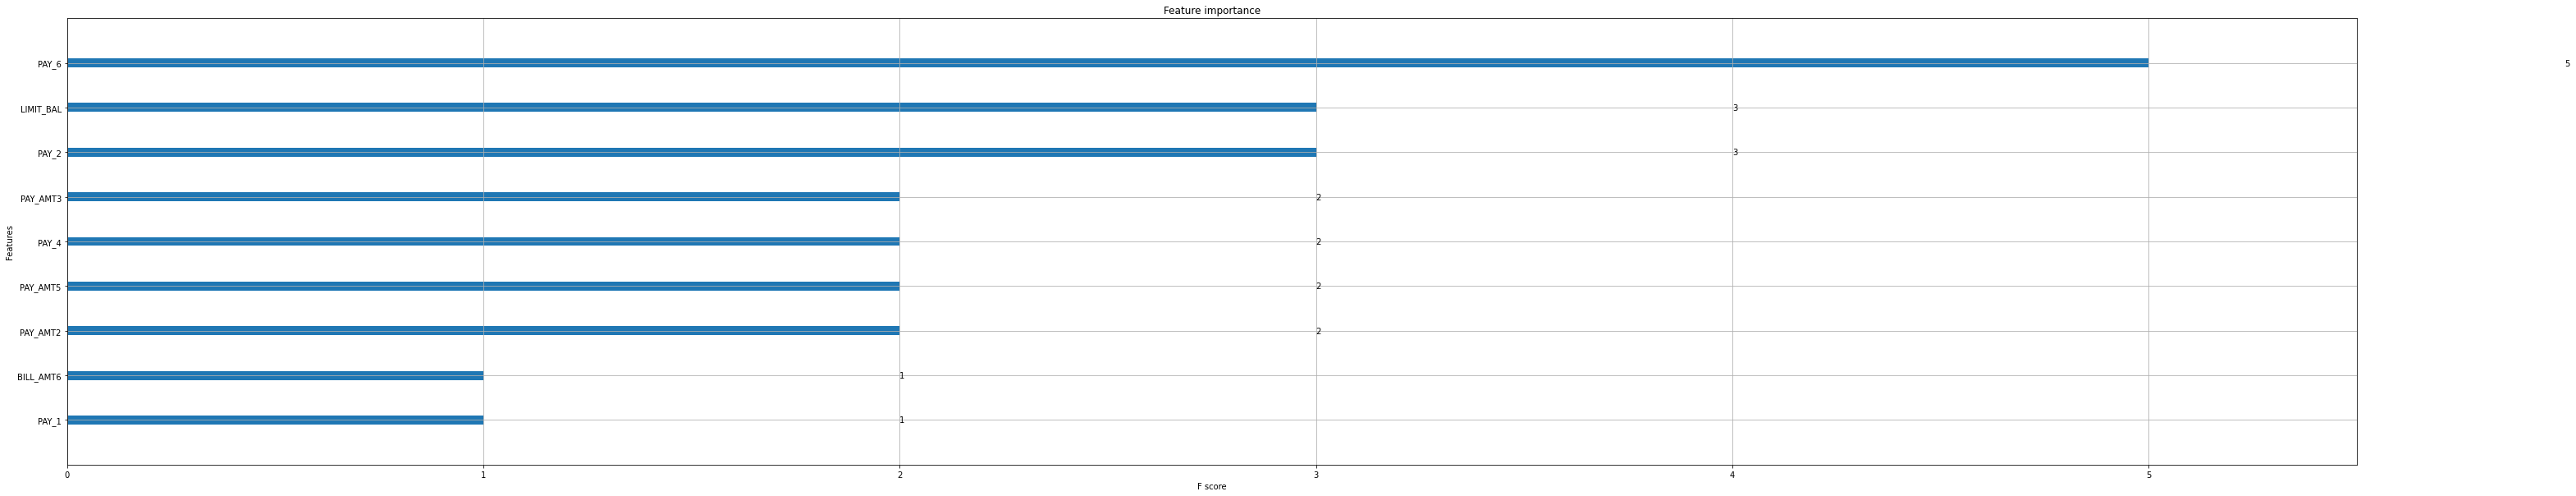

In [146]:
# show importance of parameters
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()